DOWNLOAD DATASETS

In [0]:
!wget  https://github.com/zalandoresearch/fashion-mnist
!git clone https://github.com/keras-team/keras-tuner.git

In [0]:
%cd keras-tuner
!pip install .

IMPORT LIBRARIES

In [0]:
from tensorflow.keras.datasets  import fashion_mnist
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners          import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras           import utils
from google.colab               import files
from random                     import randint
from PIL                        import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cbook  as cbook
import numpy as np

# Download data
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

x_train = x_train.reshape(60000,784)
x_train = x_train / 255

x_test  = x_test.reshape(10000,784)
x_test  = x_test  / 255

In [0]:
y_train = utils.to_categorical(y_train,10)
y_test  = utils.to_categorical(y_test,10)

classes = ['T-shirt','shorts','sweater','dress','coat',
           'shoes','shirt','sneakers','bag','boots']



SET THE FUNCTION OF CREATING A NEURAL NETWORK

---



In [0]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Fully connected layer, with different amount of neurons
                                   min_value=128,  # The minimum amount of neurons - 128
                                   max_value=1024, # The max amount of neurons - 1024
                                   step=32),
                    input_dim=784,
                    activation=activation_choice))
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=128,   
                                   max_value=600,   
                                   step=32),
                    activation=activation_choice))   
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model
    

CREATE TUNER

In [0]:
# Random-Search
'''tuner = RandomSearch(
    build_model,                 # Create model
    objective='val_accuracy',    # Metric
                              
    max_trials=7,               # max amount of training launches 
    directory='test_directory'   # catalogue  
    )'''

# BayesianOptimization
tuner = BayesianOptimization (
    build_model,                 # Create model
    objective='val_accuracy',    # Metric
                              
    max_trials=7,               # max amount of training launches 
    directory='test_directory'   # catalogue  
    
)


LAUNCH

In [59]:
tuner.search_space_summary()

EARLY-STOPPING CALLBACK

In [0]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2)

Getting Hyper-parametrs

In [61]:
history = tuner.search(x_train,        # Data for training
             y_train,                  # Right answers
             batch_size=256,           # mini picks
             epochs=10,                 # amount of epochs 
             validation_split=0.2,     # Checking data
             callbacks=[early_stopping_callback]
             )

Epoch 1/10
188/188 [==============================] - 8s 40ms/step - loss: 0.6583 - accuracy: 0.7628 - val_loss: 0.4827 - val_accuracy: 0.8127
Epoch 2/10
188/188 [==============================] - 7s 40ms/step - loss: 0.4206 - accuracy: 0.8420 - val_loss: 0.4033 - val_accuracy: 0.8497
Epoch 3/10
188/188 [==============================] - 7s 40ms/step - loss: 0.3643 - accuracy: 0.8636 - val_loss: 0.4603 - val_accuracy: 0.8259
Epoch 4/10
188/188 [==============================] - 7s 40ms/step - loss: 0.3285 - accuracy: 0.8769 - val_loss: 0.3984 - val_accuracy: 0.8532
Epoch 5/10
188/188 [==============================] - 7s 40ms/step - loss: 0.3035 - accuracy: 0.8873 - val_loss: 0.3846 - val_accuracy: 0.8561
Epoch 6/10
188/188 [==============================] - 7s 40ms/step - loss: 0.2873 - accuracy: 0.8913 - val_loss: 0.3468 - val_accuracy: 0.8773
Epoch 7/10
188/188 [==============================] - 7s 39ms/step - loss: 0.2689 - accuracy: 0.8982 - val_loss: 0.3568 - val_accuracy: 0.8769

Epoch 1/10
188/188 [==============================] - 8s 41ms/step - loss: 0.5270 - accuracy: 0.8141 - val_loss: 0.3824 - val_accuracy: 0.8632
Epoch 2/10
188/188 [==============================] - 8s 41ms/step - loss: 0.3667 - accuracy: 0.8679 - val_loss: 0.3826 - val_accuracy: 0.8613
Epoch 3/10
188/188 [==============================] - 8s 40ms/step - loss: 0.3242 - accuracy: 0.8799 - val_loss: 0.3420 - val_accuracy: 0.8783
Epoch 4/10
188/188 [==============================] - 8s 40ms/step - loss: 0.3020 - accuracy: 0.8889 - val_loss: 0.3404 - val_accuracy: 0.8760
Epoch 5/10
188/188 [==============================] - 8s 42ms/step - loss: 0.2813 - accuracy: 0.8954 - val_loss: 0.3374 - val_accuracy: 0.8821
Epoch 6/10
188/188 [==============================] - 8s 40ms/step - loss: 0.2625 - accuracy: 0.9030 - val_loss: 0.3218 - val_accuracy: 0.8820
Epoch 7/10
188/188 [==============================] - 8s 40ms/step - loss: 0.2489 - accuracy: 0.9068 - val_loss: 0.3123 - val_accuracy: 0.8892

Epoch 1/10
188/188 [==============================] - 2s 12ms/step - loss: 0.9251 - accuracy: 0.6885 - val_loss: 0.6751 - val_accuracy: 0.7691
Epoch 2/10
188/188 [==============================] - 2s 12ms/step - loss: 0.6172 - accuracy: 0.7895 - val_loss: 0.5788 - val_accuracy: 0.7939
Epoch 3/10
188/188 [==============================] - 2s 12ms/step - loss: 0.5511 - accuracy: 0.8095 - val_loss: 0.5334 - val_accuracy: 0.8120
Epoch 4/10
188/188 [==============================] - 2s 12ms/step - loss: 0.5161 - accuracy: 0.8206 - val_loss: 0.5046 - val_accuracy: 0.8207
Epoch 5/10
188/188 [==============================] - 2s 12ms/step - loss: 0.4932 - accuracy: 0.8278 - val_loss: 0.4877 - val_accuracy: 0.8253
Epoch 6/10
188/188 [==============================] - 2s 12ms/step - loss: 0.4776 - accuracy: 0.8321 - val_loss: 0.4738 - val_accuracy: 0.8323
Epoch 7/10
188/188 [==============================] - 2s 12ms/step - loss: 0.4647 - accuracy: 0.8376 - val_loss: 0.4731 - val_accuracy: 0.8313

Epoch 1/10
188/188 [==============================] - 6s 32ms/step - loss: 0.5308 - accuracy: 0.8162 - val_loss: 0.4256 - val_accuracy: 0.8537
Epoch 2/10
188/188 [==============================] - 6s 32ms/step - loss: 0.3797 - accuracy: 0.8634 - val_loss: 0.3792 - val_accuracy: 0.8616
Epoch 3/10
188/188 [==============================] - 6s 31ms/step - loss: 0.3363 - accuracy: 0.8766 - val_loss: 0.3510 - val_accuracy: 0.8759
Epoch 4/10
188/188 [==============================] - 6s 31ms/step - loss: 0.3046 - accuracy: 0.8883 - val_loss: 0.3189 - val_accuracy: 0.8868
Epoch 5/10
188/188 [==============================] - 6s 31ms/step - loss: 0.2829 - accuracy: 0.8961 - val_loss: 0.3257 - val_accuracy: 0.8842
Epoch 6/10
188/188 [==============================] - 6s 31ms/step - loss: 0.2686 - accuracy: 0.8999 - val_loss: 0.3158 - val_accuracy: 0.8823


Epoch 1/10
188/188 [==============================] - 8s 45ms/step - loss: 1.2668 - accuracy: 0.6447 - val_loss: 0.8524 - val_accuracy: 0.7394
Epoch 2/10
188/188 [==============================] - 8s 45ms/step - loss: 0.7598 - accuracy: 0.7613 - val_loss: 0.6849 - val_accuracy: 0.7818
Epoch 3/10
188/188 [==============================] - 8s 45ms/step - loss: 0.6484 - accuracy: 0.7946 - val_loss: 0.6102 - val_accuracy: 0.8031
Epoch 4/10
188/188 [==============================] - 8s 45ms/step - loss: 0.5907 - accuracy: 0.8091 - val_loss: 0.5710 - val_accuracy: 0.8103
Epoch 5/10
188/188 [==============================] - 8s 45ms/step - loss: 0.5539 - accuracy: 0.8190 - val_loss: 0.5396 - val_accuracy: 0.8193
Epoch 6/10
188/188 [==============================] - 8s 45ms/step - loss: 0.5269 - accuracy: 0.8249 - val_loss: 0.5249 - val_accuracy: 0.8213
Epoch 7/10
188/188 [==============================] - 8s 45ms/step - loss: 0.5075 - accuracy: 0.8323 - val_loss: 0.5146 - val_accuracy: 0.8218

Epoch 1/10
188/188 [==============================] - 1s 8ms/step - loss: 0.6261 - accuracy: 0.7872 - val_loss: 0.4604 - val_accuracy: 0.8382
Epoch 2/10
188/188 [==============================] - 1s 7ms/step - loss: 0.4179 - accuracy: 0.8529 - val_loss: 0.4110 - val_accuracy: 0.8535
Epoch 3/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3770 - accuracy: 0.8661 - val_loss: 0.3879 - val_accuracy: 0.8631
Epoch 4/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3495 - accuracy: 0.8744 - val_loss: 0.4184 - val_accuracy: 0.8455
Epoch 5/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3260 - accuracy: 0.8824 - val_loss: 0.3551 - val_accuracy: 0.8736
Epoch 6/10
188/188 [==============================] - 1s 8ms/step - loss: 0.3077 - accuracy: 0.8874 - val_loss: 0.3341 - val_accuracy: 0.8794
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.2945 - accuracy: 0.8925 - val_loss: 0.3333 - val_accuracy: 0.8790
Epoch 

Epoch 1/10
188/188 [==============================] - 9s 49ms/step - loss: 0.5901 - accuracy: 0.8055 - val_loss: 0.4985 - val_accuracy: 0.8167
Epoch 2/10
188/188 [==============================] - 9s 48ms/step - loss: 0.4077 - accuracy: 0.8536 - val_loss: 0.3979 - val_accuracy: 0.8497
Epoch 3/10
188/188 [==============================] - 9s 48ms/step - loss: 0.3654 - accuracy: 0.8676 - val_loss: 0.3796 - val_accuracy: 0.8609
Epoch 4/10
188/188 [==============================] - 9s 48ms/step - loss: 0.3544 - accuracy: 0.8706 - val_loss: 0.3446 - val_accuracy: 0.8758
Epoch 5/10
188/188 [==============================] - 9s 48ms/step - loss: 0.3180 - accuracy: 0.8841 - val_loss: 0.3803 - val_accuracy: 0.8702
Epoch 6/10
188/188 [==============================] - 9s 48ms/step - loss: 0.3108 - accuracy: 0.8847 - val_loss: 0.3319 - val_accuracy: 0.8798
Epoch 7/10
188/188 [==============================] - 9s 48ms/step - loss: 0.2809 - accuracy: 0.8940 - val_loss: 0.3501 - val_accuracy: 0.8742

INFO:tensorflow:Oracle triggered exit


CHOOSE BEST MODEL

In [0]:
tuner.results_summary()

In [0]:
models = tuner.get_best_models(num_models=3) 

In [64]:
for model in models:
  print(model)
  model.summary()
  model.evaluate(x_test,y_test)
  print()
best_model    = models[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               703360    
_________________________________________________________________
dense_1 (Dense)              (None, 416)               373152    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4170      
Total params: 1,080,682
Trainable params: 1,080,682
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8890

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 864)               678240    
_________________________________________________________________
de

SAVING MODEL

In [0]:
best_model.save('fashion_mnist_dense.h5')

In [0]:
history=best_model.fit(x_train,y_train,batch_size=256,epochs=10,validation_split=0.2,verbose=2,callbacks=[early_stopping_callback])

GRAPH VIZUALIZATION OF EDUCATIONAL PROCESS

---



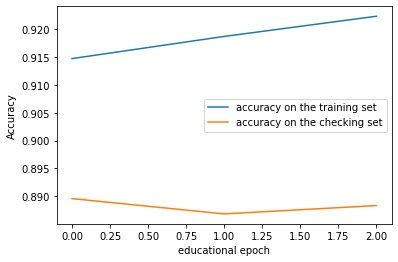

In [67]:
plt.plot(history.history['accuracy'],      label = 'accuracy on the training set')
plt.plot(history.history['val_accuracy'],  label = 'accuracy on the checking set')
plt.xlabel('educational epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

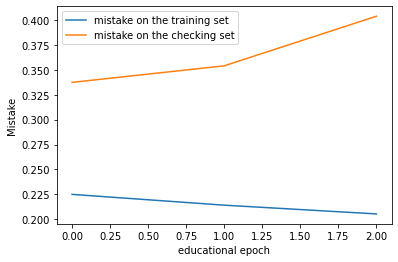

In [68]:
plt.plot(history.history['loss'],      label = 'mistake on the training set')
plt.plot(history.history['val_loss'],  label = 'mistake on the checking set')
plt.xlabel('educational epoch')
plt.ylabel('Mistake')
plt.legend()
plt.show()

[1.82888691e-08 7.74136432e-17 9.99967098e-01 3.32093863e-13
 2.97352544e-05 1.01747021e-13 3.06993616e-06 1.05226289e-15
 1.26730046e-14 3.94654462e-19]
2


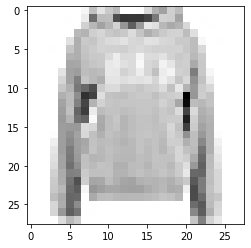

The Answer is sweater


In [69]:
# Launch network on input data
predictions = best_model.predict(x_test)
random_item = randint(0,10000)
# Print one of the results of recognition
print(predictions[random_item])

# Print  class number,which was predicted by neural-Network 
print(np.argmax(predictions[random_item]))
index = np.argmax(y_test[random_item])
plt.imshow(x_test[random_item].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('The Answer is ' + classes[index])
